## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train_FD002.txt', sep=" ", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,NaN,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,NaN,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,NaN,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,NaN,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189,NaN,NaN
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454,NaN,NaN
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503,NaN,NaN
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729,NaN,NaN


## The last two columns have values as NaN so we need to drop them.

In [3]:
# Create a list of column indices to drop
columns_to_drop = [27, 26]

# Drop the columns from the DataFrame
df = df.drop(df.columns[columns_to_drop], axis=1)

df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,183.06,2387.72,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,130.42,2387.66,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,164.22,2028.03,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,130.72,2387.61,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,164.31,2028.00,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,491.19,608.79,1495.60,1269.51,9.35,...,314.05,2389.02,8169.64,9.3035,0.03,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,489.05,605.81,1514.32,1324.12,10.52,...,371.22,2388.42,8245.36,8.7586,0.03,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,462.54,537.48,1276.24,1057.92,7.05,...,163.74,2030.33,7971.25,11.0657,0.02,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,462.54,537.84,1272.95,1066.30,7.05,...,164.37,2030.35,7972.47,11.0537,0.02,311,1915,84.93,14.05,8.3729


In [4]:
df.columns = df.columns.astype(str)
column_names = df.columns
print(column_names)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25'],
      dtype='object')


## We need to rename these columns to actual column names.

In [5]:
new_column_names = {
    '0': 'Engine_Unit_Number',
    '1': 'Time_In_Cycles',
    '2': 'Operating_settings_1',
    '3': 'Operating_settings_2',
    '4': 'Operating_settings_3',
    '5': 'Sensor_readings_1',
    '6': 'Sensor_readings_2',
    '7': 'Sensor_readings_3',
    '8': 'Sensor_readings_4',
    '9': 'Sensor_readings_5',
    '10': 'Sensor_readings_6',
    '11': 'Sensor_readings_7',
    '12': 'Sensor_readings_8',
    '13': 'Sensor_readings_9',
    '14': 'Sensor_readings_10',
    '15': 'Sensor_readings_11',
    '16': 'Sensor_readings_12',
    '17': 'Sensor_readings_13',
    '18': 'Sensor_readings_14',
    '19': 'Sensor_readings_15',
    '20': 'Sensor_readings_16',
    '21': 'Sensor_readings_17',
    '22': 'Sensor_readings_18',
    '23': 'Sensor_readings_19',
    '24': 'Sensor_readings_20',
    '25': 'Sensor_readings_21'
}

df = df.rename(columns=new_column_names)


In [6]:
df.describe()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_1,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,...,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_15,Sensor_readings_16,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
count,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,...,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000,53759.000000
mean,131.082981,109.154746,23.998407,0.572056,94.046020,472.910207,579.672399,1419.971013,1205.442024,8.031986,...,266.069034,2334.557253,8066.597682,9.329654,0.023326,348.309511,2228.806358,97.756838,20.789296,12.473423
std,74.463862,69.180569,14.747376,0.310016,14.237735,26.389707,37.289399,105.946341,119.123428,3.613839,...,137.659507,128.068271,84.837950,0.749335,0.004711,27.754515,145.327980,5.364067,9.869331,5.921615
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.530000,1243.730000,1023.770000,3.910000,...,129.120000,2027.610000,7848.360000,8.335700,0.020000,303.000000,1915.000000,84.930000,10.180000,6.010500
25%,68.000000,52.000000,10.004600,0.250700,100.000000,445.000000,549.570000,1352.760000,1123.655000,3.910000,...,131.520000,2387.900000,8062.140000,8.677800,0.020000,331.000000,2212.000000,100.000000,10.910000,6.546300
50%,131.000000,104.000000,25.001300,0.700000,100.000000,462.540000,555.980000,1369.180000,1138.890000,7.050000,...,183.200000,2388.080000,8082.540000,9.310900,0.020000,335.000000,2223.000000,100.000000,14.880000,8.929200
75%,195.000000,157.000000,41.998000,0.840000,100.000000,491.190000,607.340000,1499.370000,1306.850000,10.520000,...,371.260000,2388.170000,8127.195000,9.386900,0.030000,369.000000,2324.000000,100.000000,28.470000,17.083200
max,260.000000,378.000000,42.008000,0.842000,100.000000,518.670000,644.520000,1612.880000,1439.230000,14.620000,...,523.370000,2390.480000,8268.500000,11.066900,0.030000,399.000000,2388.000000,100.000000,39.340000,23.590100


#### We can drop the sensor readings with a standard deviation of 0 and create a new dataframe to facilitate experimentation and analysis.

In [7]:
df.std()

Engine_Unit_Number       74.463862
Time_In_Cycles           69.180569
Operating_settings_1     14.747376
Operating_settings_2      0.310016
Operating_settings_3     14.237735
Sensor_readings_1        26.389707
Sensor_readings_2        37.289399
Sensor_readings_3       105.946341
Sensor_readings_4       119.123428
Sensor_readings_5         3.613839
Sensor_readings_6         5.431802
Sensor_readings_7       146.005306
Sensor_readings_8       145.209816
Sensor_readings_9       335.812013
Sensor_readings_10        0.127469
Sensor_readings_11        3.232372
Sensor_readings_12      137.659507
Sensor_readings_13      128.068271
Sensor_readings_14       84.837950
Sensor_readings_15        0.749335
Sensor_readings_16        0.004711
Sensor_readings_17       27.754515
Sensor_readings_18      145.327980
Sensor_readings_19        5.364067
Sensor_readings_20        9.869331
Sensor_readings_21        5.921615
dtype: float64

Note that sensors, 15, 10 and 16 have very little fluctuation, while sensors 20 and 5 have the highest fluctuations...

In [8]:
# Dropping columns
drop_columns = ['Sensor_readings_15', 'Sensor_readings_16', 'Sensor_readings_10', 'Sensor_readings_1']
df = df.drop(drop_columns, axis = 1)
df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21
0,1,1,34.9983,0.8400,100.0,555.32,1358.61,1137.23,5.48,8.00,...,8341.91,42.02,183.06,2387.72,8048.56,334,2223,100.00,14.73,8.8071
1,1,2,41.9982,0.8408,100.0,549.90,1353.22,1125.78,3.91,5.71,...,8303.96,42.20,130.42,2387.66,8072.30,330,2212,100.00,10.41,6.2665
2,1,3,24.9988,0.6218,60.0,537.31,1256.76,1047.45,7.05,9.02,...,8001.42,36.69,164.22,2028.03,7864.87,309,1915,84.93,14.08,8.6723
3,1,4,42.0077,0.8416,100.0,549.51,1354.03,1126.38,3.91,5.71,...,8303.96,41.96,130.72,2387.61,8068.66,329,2212,100.00,10.59,6.4701
4,1,5,25.0005,0.6203,60.0,537.07,1257.71,1047.93,7.05,9.03,...,7993.23,36.89,164.31,2028.00,7861.23,309,1915,84.93,14.13,8.5286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,20.0037,0.7000,100.0,608.79,1495.60,1269.51,9.35,13.66,...,8852.27,44.72,314.05,2389.02,8169.64,369,2324,100.00,24.36,14.5189
53755,260,313,10.0022,0.2510,100.0,605.81,1514.32,1324.12,10.52,15.50,...,8915.86,46.08,371.22,2388.42,8245.36,374,2319,100.00,28.10,16.9454
53756,260,314,25.0041,0.6200,60.0,537.48,1276.24,1057.92,7.05,9.04,...,8114.33,37.14,163.74,2030.33,7971.25,310,1915,84.93,14.19,8.5503
53757,260,315,25.0033,0.6220,60.0,537.84,1272.95,1066.30,7.05,9.04,...,8112.63,37.32,164.37,2030.35,7972.47,311,1915,84.93,14.05,8.3729


In [9]:
def add_remaining_useful_life(df):
    # Getting the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="Engine_Unit_Number")
    max_cycle = grouped_by_unit["Time_In_Cycles"].max()

    # Merging the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='Engine_Unit_Number', right_index=True)

    # Calculating remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Time_In_Cycles"]
    result_frame["RUL"] = remaining_useful_life

    # dropping max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

df = add_remaining_useful_life(df)
df.head()

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,34.9983,0.8400,100.0,555.32,1358.61,1137.23,5.48,8.00,...,42.02,183.06,2387.72,8048.56,334,2223,100.00,14.73,8.8071,148
1,1,2,41.9982,0.8408,100.0,549.90,1353.22,1125.78,3.91,5.71,...,42.20,130.42,2387.66,8072.30,330,2212,100.00,10.41,6.2665,147
2,1,3,24.9988,0.6218,60.0,537.31,1256.76,1047.45,7.05,9.02,...,36.69,164.22,2028.03,7864.87,309,1915,84.93,14.08,8.6723,146
3,1,4,42.0077,0.8416,100.0,549.51,1354.03,1126.38,3.91,5.71,...,41.96,130.72,2387.61,8068.66,329,2212,100.00,10.59,6.4701,145
4,1,5,25.0005,0.6203,60.0,537.07,1257.71,1047.93,7.05,9.03,...,36.89,164.31,2028.00,7861.23,309,1915,84.93,14.13,8.5286,144


# **Data Visualisations**

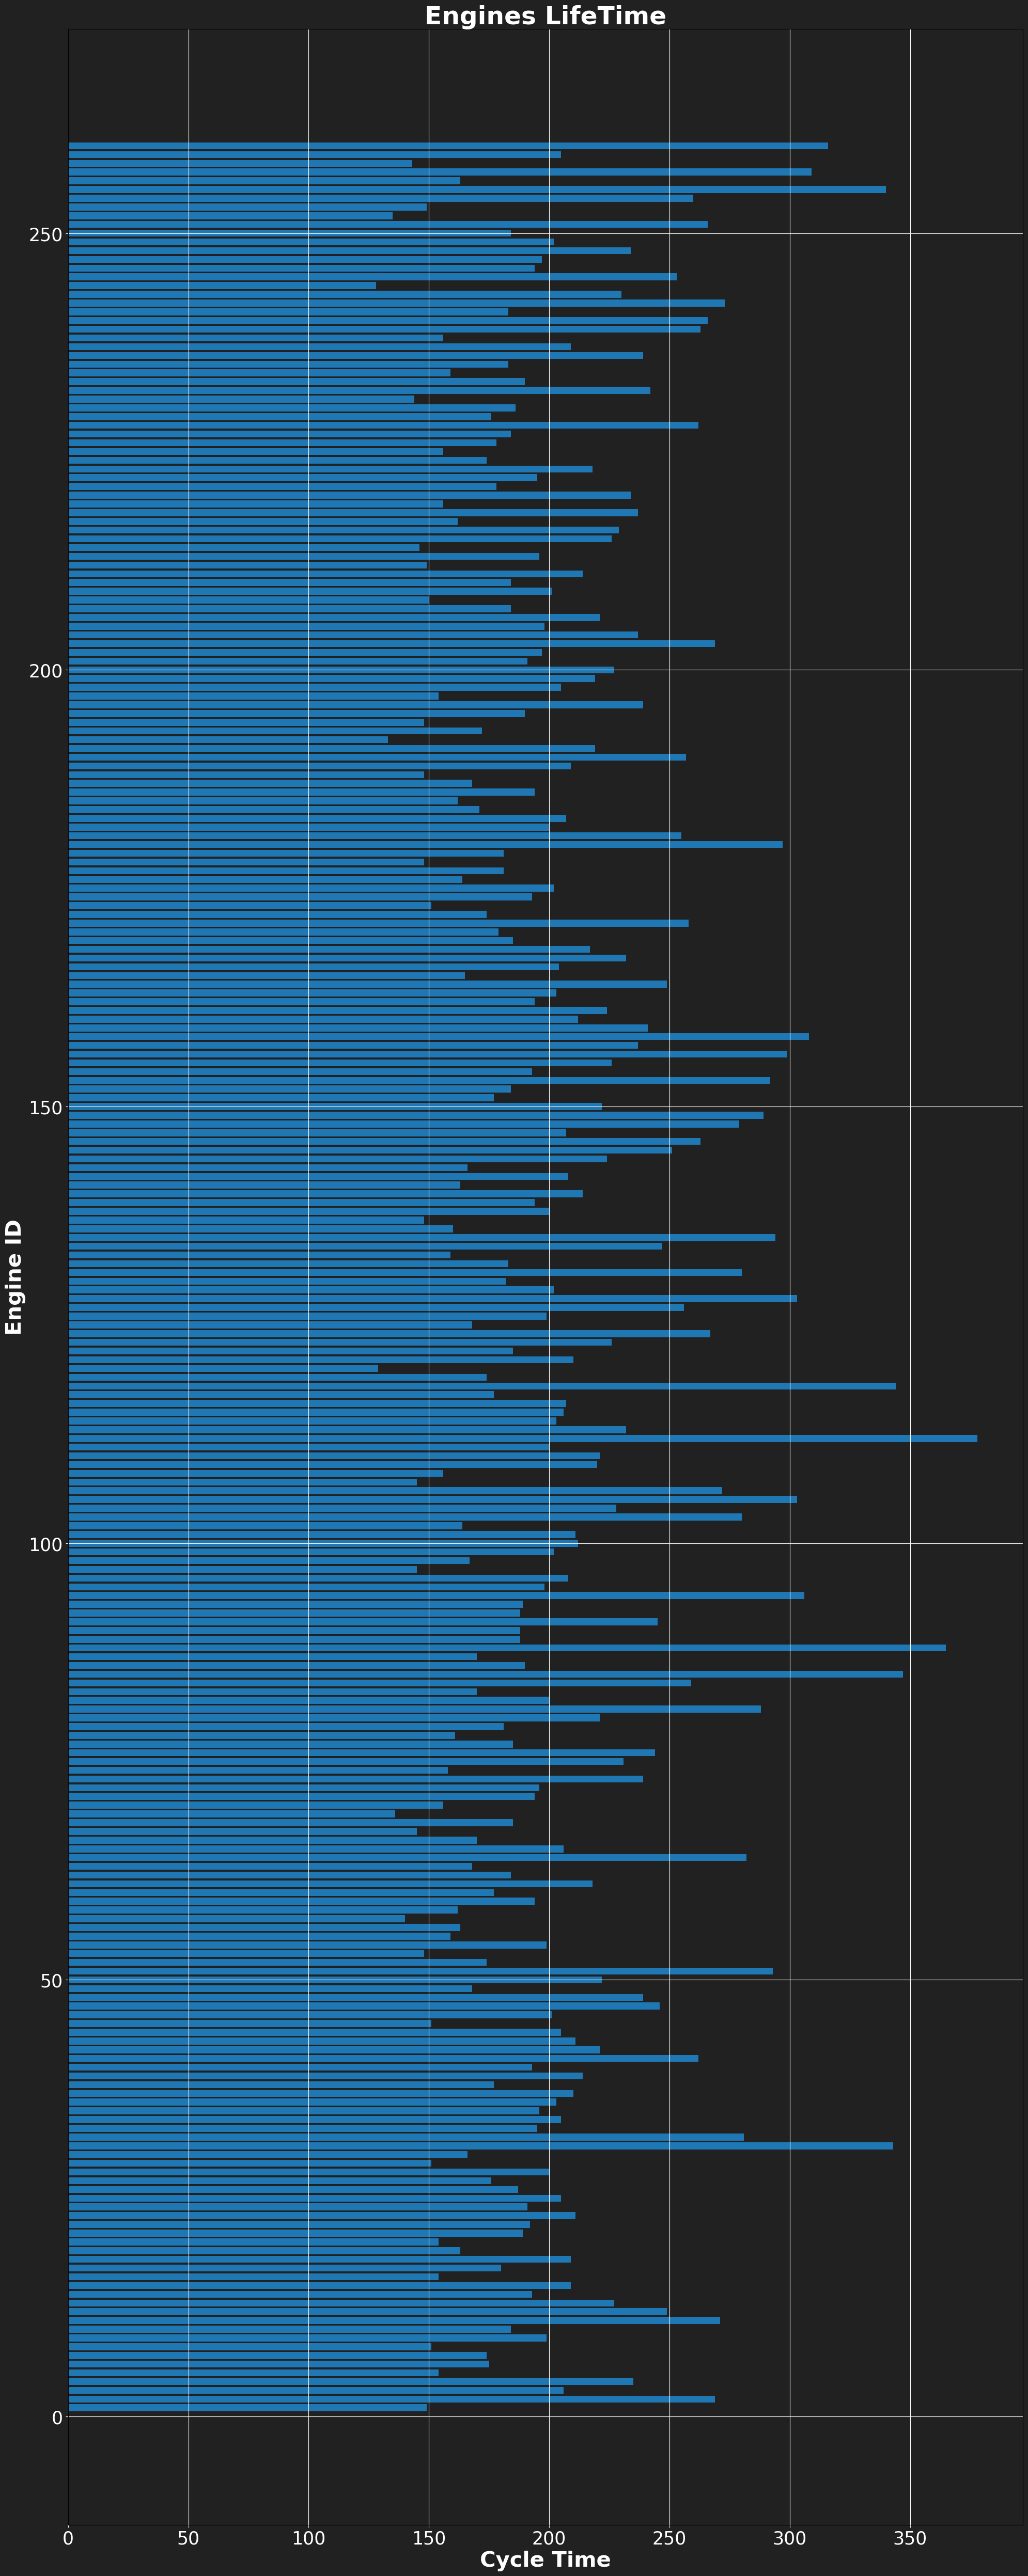

In [10]:
import matplotlib.pyplot as plt

# Create the figure and axes with a specific size
fig, ax = plt.subplots(figsize=(20, 50))

# Set the background color
fig.patch.set_facecolor('#212121')  # Set a specific color code for the background
ax.set_facecolor('#212121')

# Group the dataframe by 'Engine_Unit_Number' and find the maximum 'Time_In_Cycles' for each group
engine_cycles = df.groupby('Engine_Unit_Number')['Time_In_Cycles'].max()

# Plot the horizontal bar chart
ax.barh(engine_cycles.index, engine_cycles, height=0.8, align='center')

# Set the title and axis labels
ax.set_title('Engines LifeTime', fontweight='bold', size=35, color='white')
ax.set_xlabel('Cycle Time', fontweight='bold', size=30, color='white')
ax.set_ylabel('Engine ID', fontweight='bold', size=30, color='white')

# Set the tick labels font size and color
ax.tick_params(axis='both', labelsize=25, colors='white')

# Enable gridlines
ax.grid(True, color='white')

# Adjust the layout for better spacing
fig.tight_layout()

# Display the plot
plt.show()


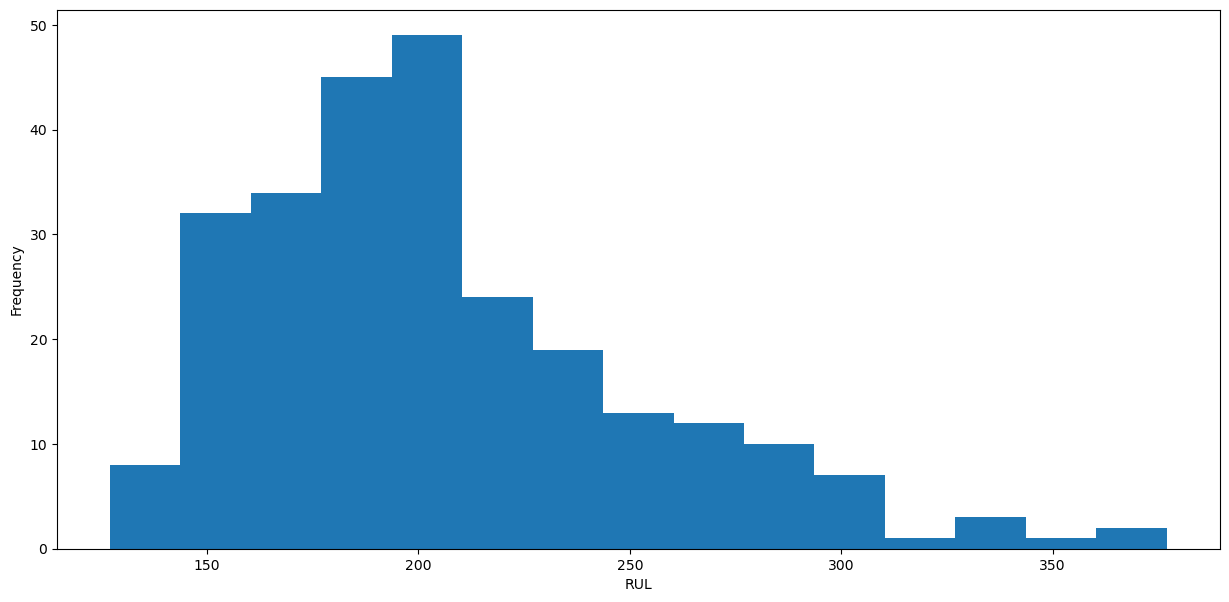

In [11]:
# Calculate the maximum RUL for each engine unit number
df_max_rul = df.groupby('Engine_Unit_Number')['RUL'].max()

# Create a new figure with a specific size
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the histogram of RUL values
ax.hist(df_max_rul, bins=15)

# Set the x-axis and y-axis labels
ax.set_xlabel('RUL')
ax.set_ylabel('Frequency')

# Display the plot
plt.show()


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sensor(sensor_name):
    fig, ax = plt.subplots(figsize=(13, 5))

    for engine_num in range(0, df['Engine_Unit_Number'].nunique(), 10):
        engine_data = df[df['Engine_Unit_Number'] == engine_num]
        ax.plot(engine_data['RUL'], engine_data[sensor_name])

    ax.set_xlim(250, 0)
    ax.set_xticks(np.arange(0, 275, 25))
    ax.set_ylabel(sensor_name)
    ax.set_xlabel('Remaining Useful Life')

    plt.show()


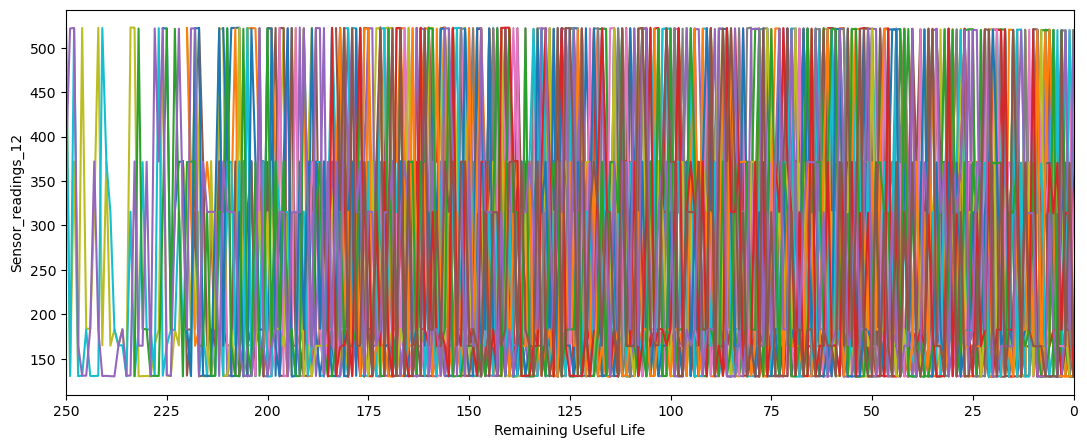

In [14]:
plot_sensor("Sensor_readings_12")

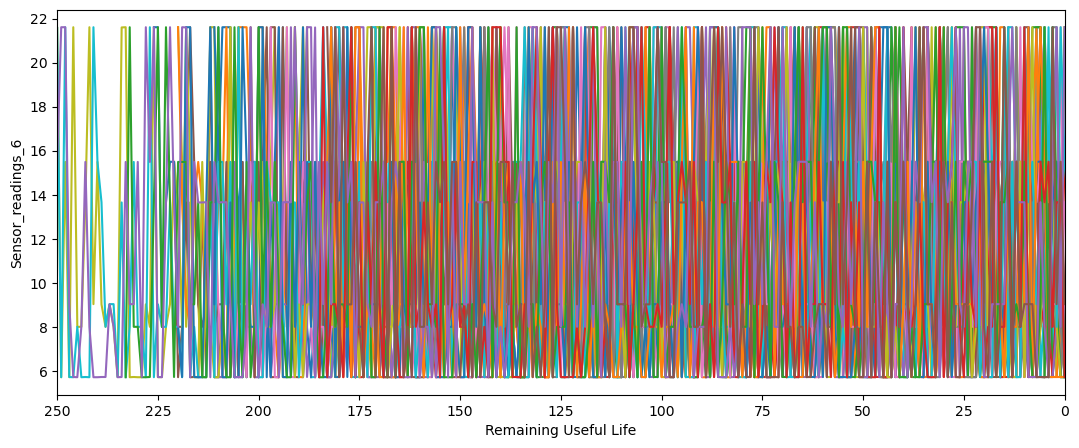

In [15]:
plot_sensor("Sensor_readings_6")

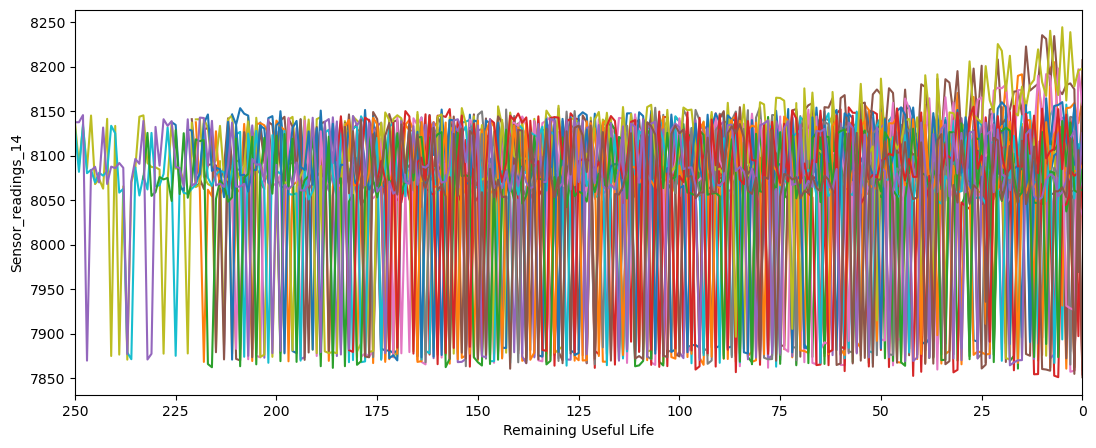

In [18]:
plot_sensor("Sensor_readings_14")

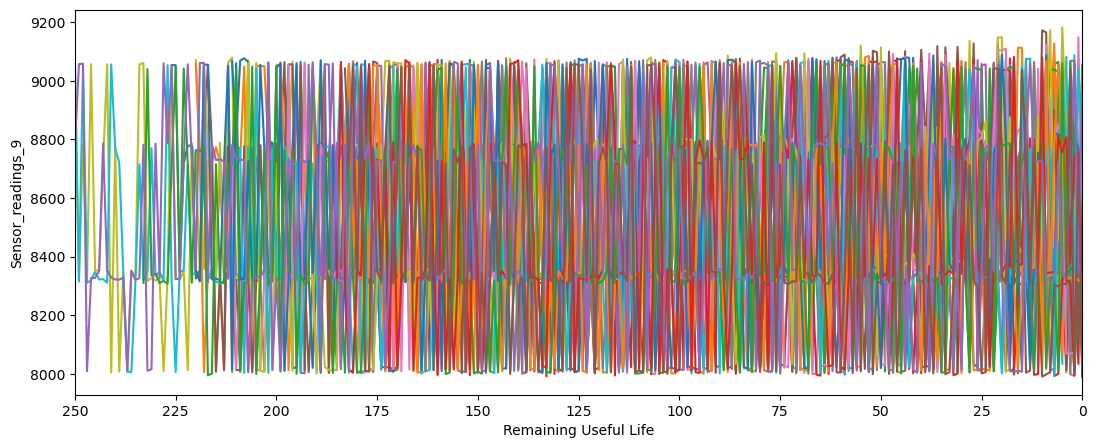

In [21]:
plot_sensor("Sensor_readings_9")

### Normalization

In [23]:
# Selecting columns for normalization
columns_to_normalize = ['Operating_settings_1',	'Operating_settings_2',	'Operating_settings_3', 'Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8', 'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_5',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21',	'Sensor_readings_18',	'Sensor_readings_19',	'Sensor_readings_6']

# Extracting the columns to be normalized
columns_data = df[columns_to_normalize]

# Performing the Min-Max normalization on selected columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(columns_data)

# Updating the DataFrame with normalized values
df[columns_to_normalize] = normalized_data

df

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21,RUL
0,1,1,0.833134,0.997625,1.0,0.181576,0.311201,0.273095,0.146592,0.144025,...,0.471498,0.136817,0.992394,0.476508,0.322917,0.651163,1.0,0.156036,0.159082,148
1,1,2,0.999767,0.998575,1.0,0.131847,0.296600,0.245535,0.000000,0.000000,...,0.486156,0.003297,0.992229,0.533013,0.281250,0.627907,1.0,0.007888,0.014562,147
2,1,3,0.595096,0.738480,0.0,0.016332,0.035297,0.056997,0.293184,0.208176,...,0.037459,0.089030,0.001157,0.039296,0.062500,0.000000,0.0,0.133745,0.151414,146
3,1,4,0.999993,0.999525,1.0,0.128269,0.298795,0.246979,0.000000,0.000000,...,0.466612,0.004058,0.992091,0.524349,0.270833,0.627907,1.0,0.014060,0.026144,145
4,1,5,0.595137,0.736698,0.0,0.014130,0.037871,0.058152,0.293184,0.208805,...,0.053746,0.089258,0.001075,0.030633,0.062500,0.000000,0.0,0.135460,0.143240,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53754,260,312,0.476188,0.831354,1.0,0.672172,0.682297,0.591489,0.507937,0.500000,...,0.691368,0.469068,0.995977,0.764697,0.687500,0.864693,1.0,0.486283,0.483993,4
53755,260,313,0.238102,0.298100,1.0,0.644830,0.733008,0.722934,0.617180,0.615723,...,0.802117,0.614077,0.994323,0.944923,0.739583,0.854123,1.0,0.614540,0.622022,3
53756,260,314,0.595222,0.736342,0.0,0.017892,0.088067,0.082198,0.293184,0.209434,...,0.074104,0.087812,0.007496,0.292498,0.072917,0.000000,0.0,0.137517,0.144474,2
53757,260,315,0.595203,0.738717,0.0,0.021195,0.079155,0.102368,0.293184,0.209434,...,0.088762,0.089410,0.007551,0.295402,0.083333,0.000000,0.0,0.132716,0.134383,1


In [24]:
# Grouping the DataFrame by the 'Engine_Unit_Number' column
grouped = df.groupby('Engine_Unit_Number')

# Iterating over the groups and creating individual DataFrames
individual_dfxstd = []
for group_name, group_df in grouped:
    individual_dfxstd.append(group_df)

individual_dfxstd[1]

,Engine_Unit_Number,Time_In_Cycles,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_5,Sensor_readings_6,...,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_17,Sensor_readings_18,Sensor_readings_19,Sensor_readings_20,Sensor_readings_21,RUL
149,2,1,0.000060,0.000000,1.0,0.977246,0.935067,0.915925,1.000000,1.000000,...,0.906352,0.994952,0.993414,0.701338,0.937500,1.000000,1.0,0.984225,0.979664,268
150,2,2,0.833313,0.997625,1.0,0.189008,0.325288,0.242936,0.146592,0.144025,...,0.470684,0.136817,0.993496,0.534703,0.322917,0.651163,1.0,0.160494,0.164662,267
151,2,3,0.000048,0.000000,1.0,0.983852,0.932683,0.924180,1.000000,1.000000,...,0.908795,0.996297,0.993414,0.698386,0.937500,1.000000,1.0,0.979081,0.978771,266
152,2,4,0.999805,0.997625,1.0,0.132397,0.283435,0.236509,0.000000,0.000000,...,0.460912,0.002511,0.993662,0.582473,0.291667,0.627907,1.0,0.017147,0.022754,265
153,2,5,0.000057,0.002375,1.0,0.978805,0.928999,0.922520,1.000000,1.000000,...,0.909609,0.995206,0.993276,0.711501,0.916667,1.000000,1.0,0.989369,0.989664,264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,265,0.238181,0.298575,1.0,0.645105,0.731491,0.748279,0.617180,0.615723,...,0.798860,0.611287,0.994075,0.732780,0.729167,0.854123,1.0,0.623457,0.623712,4
414,2,266,0.000014,0.000000,1.0,0.991192,0.959989,0.968974,1.000000,1.000000,...,0.974756,0.990564,0.993744,0.740396,0.958333,1.000000,1.0,0.972222,0.971950,3
415,2,267,0.595265,0.736342,0.0,0.018534,0.086333,0.077865,0.293184,0.208805,...,0.080619,0.090095,0.002921,0.115438,0.062500,0.000000,0.0,0.138203,0.146880,2
416,2,268,0.595127,0.736461,0.0,0.014772,0.082053,0.109012,0.293184,0.208805,...,0.080619,0.086772,0.002866,0.120626,0.072917,0.000000,0.0,0.130658,0.135202,1


# Training on various types of Models

In [25]:
x = df[['Operating_settings_1',	'Operating_settings_2',	'Operating_settings_3', 'Sensor_readings_2',	'Sensor_readings_3',	'Sensor_readings_4',	'Sensor_readings_7',	'Sensor_readings_8', 'Sensor_readings_9',	'Sensor_readings_11',	'Sensor_readings_12',	'Sensor_readings_13',	'Sensor_readings_14',	'Sensor_readings_5',	'Sensor_readings_17',	'Sensor_readings_20',	'Sensor_readings_21',	'Sensor_readings_18',	'Sensor_readings_19',	'Sensor_readings_6']]
y = df['RUL']

## **Linear Regression**

In [26]:
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [27]:
x_train_lr

,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_5,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,Sensor_readings_18,Sensor_readings_19,Sensor_readings_6
43297,0.833158,0.997862,1.0,0.195339,0.371312,0.295167,0.138013,0.651028,0.307764,0.510586,0.135650,0.993882,0.534393,0.146592,0.354167,0.151578,0.160243,0.651163,1.0,0.144025
48551,0.999948,0.999525,1.0,0.132856,0.305188,0.250638,0.004153,0.626789,0.262849,0.470684,0.003450,0.992201,0.532180,0.000000,0.291667,0.021262,0.019426,0.627907,1.0,0.000629
19038,0.238064,0.296912,1.0,0.639600,0.709170,0.696601,0.614147,0.853490,0.680717,0.770358,0.613976,0.993855,0.770481,0.617180,0.718750,0.624829,0.629389,0.854123,1.0,0.615723
7605,0.999976,0.997625,1.0,0.131755,0.264608,0.231502,0.004487,0.627317,0.271953,0.467427,0.004058,0.993166,0.554720,0.000000,0.281250,0.015432,0.022725,0.627907,1.0,0.000000
21926,0.238048,0.296912,1.0,0.639049,0.698388,0.700332,0.612023,0.853575,0.646061,0.761401,0.613722,0.993882,0.659804,0.617180,0.718750,0.632373,0.623114,0.854123,1.0,0.615723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.238207,0.297031,1.0,0.636572,0.675742,0.678814,0.614147,0.853195,0.653646,0.745928,0.616386,0.993386,0.684367,0.617180,0.666667,0.634088,0.634832,0.854123,1.0,0.615094
44732,0.999841,0.998219,1.0,0.126525,0.288663,0.235570,0.005561,0.627740,0.275726,0.467427,0.004515,0.993551,0.566406,0.000000,0.281250,0.013032,0.022162,0.627907,1.0,0.000000
38158,0.476174,0.832660,1.0,0.664740,0.662901,0.564820,0.471242,0.863899,0.592708,0.691368,0.469880,0.993414,0.475294,0.507937,0.656250,0.481139,0.486718,0.864693,1.0,0.500000
860,0.833160,0.998812,1.0,0.176989,0.325559,0.232658,0.138657,0.650965,0.303927,0.448697,0.137806,0.993662,0.548246,0.146592,0.312500,0.164266,0.166665,0.651163,1.0,0.144025


In [28]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train_lr, y_train_lr)

LinearRegression()

In [29]:
y_pred_lr = reg.predict(x_test_lr)
y_pred_lr[y_pred_lr <= 0] = 0
# y_pred_lr = y_pred_lr.flatten()
y_pred_lr

array([155.84523855, 125.8440246 ,  62.80812918, ..., 127.82278877,
        97.58291283, 172.01789925])

In [30]:
results = pd.DataFrame({'Actual': y_test_lr, 'Predicted': y_pred_lr})
results

,Actual,Predicted
49203,191,155.845239
16451,250,125.844025
25865,49,62.808129
34173,25,69.914652
49742,108,119.031571
...,...,...
39312,237,152.509183
29117,190,130.937821
13004,148,127.822789
17853,108,97.582913


In [31]:
from sklearn.metrics import mean_squared_error
# Calculating mean squared error
mse = mean_squared_error(y_test_lr, y_pred_lr)

# Calculating root mean squared error
rmse = np.sqrt(mse)

# Printing the result
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 45.09263195418542


## Artificial Neural Networks

### **Iteration 1**

In [32]:
x_train_ann_1, x_test_ann_1, y_train_ann_1, y_test_ann_1 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [33]:
input_shape_train = x_train_ann_1.shape[1]
input_shape_test = x_test_ann_1.shape[1]

print("Input shape of training set is", input_shape_train)
print("Input shape of testing set is", input_shape_test)

Input shape of training set is 20
Input shape of testing set is 20


In [34]:
x_train_ann_1

,Operating_settings_1,Operating_settings_2,Operating_settings_3,Sensor_readings_2,Sensor_readings_3,Sensor_readings_4,Sensor_readings_7,Sensor_readings_8,Sensor_readings_9,Sensor_readings_11,Sensor_readings_12,Sensor_readings_13,Sensor_readings_14,Sensor_readings_5,Sensor_readings_17,Sensor_readings_20,Sensor_readings_21,Sensor_readings_18,Sensor_readings_19,Sensor_readings_6
43297,0.833158,0.997862,1.0,0.195339,0.371312,0.295167,0.138013,0.651028,0.307764,0.510586,0.135650,0.993882,0.534393,0.146592,0.354167,0.151578,0.160243,0.651163,1.0,0.144025
48551,0.999948,0.999525,1.0,0.132856,0.305188,0.250638,0.004153,0.626789,0.262849,0.470684,0.003450,0.992201,0.532180,0.000000,0.291667,0.021262,0.019426,0.627907,1.0,0.000629
19038,0.238064,0.296912,1.0,0.639600,0.709170,0.696601,0.614147,0.853490,0.680717,0.770358,0.613976,0.993855,0.770481,0.617180,0.718750,0.624829,0.629389,0.854123,1.0,0.615723
7605,0.999976,0.997625,1.0,0.131755,0.264608,0.231502,0.004487,0.627317,0.271953,0.467427,0.004058,0.993166,0.554720,0.000000,0.281250,0.015432,0.022725,0.627907,1.0,0.000000
21926,0.238048,0.296912,1.0,0.639049,0.698388,0.700332,0.612023,0.853575,0.646061,0.761401,0.613722,0.993882,0.659804,0.617180,0.718750,0.632373,0.623114,0.854123,1.0,0.615723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.238207,0.297031,1.0,0.636572,0.675742,0.678814,0.614147,0.853195,0.653646,0.745928,0.616386,0.993386,0.684367,0.617180,0.666667,0.634088,0.634832,0.854123,1.0,0.615094
44732,0.999841,0.998219,1.0,0.126525,0.288663,0.235570,0.005561,0.627740,0.275726,0.467427,0.004515,0.993551,0.566406,0.000000,0.281250,0.013032,0.022162,0.627907,1.0,0.000000
38158,0.476174,0.832660,1.0,0.664740,0.662901,0.564820,0.471242,0.863899,0.592708,0.691368,0.469880,0.993414,0.475294,0.507937,0.656250,0.481139,0.486718,0.864693,1.0,0.500000
860,0.833160,0.998812,1.0,0.176989,0.325559,0.232658,0.138657,0.650965,0.303927,0.448697,0.137806,0.993662,0.548246,0.146592,0.312500,0.164266,0.166665,0.651163,1.0,0.144025


In [35]:
y_train_ann_1

43297      6
48551    158
19038     39
7605     191
21926     42
        ... 
11284    107
44732     77
38158     82
860      152
15795    277
Name: RUL, Length: 37631, dtype: int64

In [36]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import losses
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [39]:
learning_rate = 0.1

model = Sequential()

model.add(Dense(units = 25, activation = 'tanh', input_shape = (20,))) #kernel_initializer = 'normal'
model.add(Dense(units = 15, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 10, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 5, activation = 'tanh')) #kernel_initializer = 'normal'
model.add(Dense(units = 1, activation = 'relu')) #kernel_initializer = 'normal'

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 25)                525       
                                                                 
 dense_6 (Dense)             (None, 15)                390       
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [40]:
# loss function
rmse = RootMeanSquaredError()
mse = MeanSquaredError()
# msle = MeanSquaredLogarithmicError()

model.compile(
    loss = mse,
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [rmse]
)

# training the model
history = model.fit(
    x_train_ann_1,
    y_train_ann_1,
    epochs=50,
    batch_size=64,
    #validation_split=0.2
)

Epoch 1/50
588/588 [==============================] - 3s 3ms/step - loss: 16530.3965 - root_mean_squared_error: 128.5706
Epoch 2/50
588/588 [==============================] - 2s 3ms/step - loss: 16530.4082 - root_mean_squared_error: 128.5706
Epoch 3/50
588/588 [==============================] - 2s 3ms/step - loss: 16530.4043 - root_mean_squared_error: 128.5706
Epoch 4/50
588/588 [==============================] - 2s 3ms/step - loss: 16530.4004 - root_mean_squared_error: 128.5706
Epoch 5/50
588/588 [==============================] - 1s 3ms/step - loss: 16530.3926 - root_mean_squared_error: 128.5706
Epoch 6/50
588/588 [==============================] - 1s 2ms/step - loss: 16530.4102 - root_mean_squared_error: 128.5706
Epoch 7/50
588/588 [==============================] - 2s 3ms/step - loss: 16530.4141 - root_mean_squared_error: 128.5707
Epoch 8/50
588/588 [==============================] - 2s 3ms/step - loss: 16530.4023 - root_mean_squared_error: 128.5706
Epoch 9/50
588/588 [============

In [41]:
y_pred_ann_1 = model.predict(x_test_ann_1)
pd.DataFrame(y_pred_ann_1)

504/504 [==============================] - 1s 2ms/step


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
16123,0.0
16124,0.0
16125,0.0
16126,0.0


In [42]:
pd.DataFrame(y_test_ann_1)

,RUL
49203,191
16451,250
25865,49
34173,25
49742,108
...,...
39312,237
29117,190
13004,148
17853,108


### **Iteration 2**

In [43]:
x_train_ann_2, x_test_ann_2, y_train_ann_2, y_test_ann_2 = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [44]:
input_shape_train = x_train_ann_2.shape[1]
input_shape_test = x_test_ann_2.shape[1]

print("Input shape of training set is", input_shape_train)
print("Input shape of testing set is", input_shape_test)

Input shape of training set is 20
Input shape of testing set is 20


In [45]:
learning_rate = 0.1

model = Sequential()

model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_shape = (20,)))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'leaky_relu'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 15)                315       
                                                                 
 dense_11 (Dense)            (None, 10)                160       
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 536
Trainable params: 536
Non-trainable params: 0
_________________________________________________________________


In [46]:
# loss function
rmse = RootMeanSquaredError()
mse = MeanSquaredError()
# msle = MeanSquaredLogarithmicError()

model.compile(
    loss = mse,
    optimizer = Adam(learning_rate=learning_rate),
    metrics = [rmse]
)

# training the model
history = model.fit(
    x_train_ann_2,
    y_train_ann_2,
    epochs=50,
    batch_size=64,
    #validation_split=0.2
)

Epoch 1/50
588/588 [==============================] - 3s 3ms/step - loss: 6234.8799 - root_mean_squared_error: 78.9613
Epoch 2/50
588/588 [==============================] - 1s 2ms/step - loss: 4816.6519 - root_mean_squared_error: 69.4021
Epoch 3/50
588/588 [==============================] - 1s 2ms/step - loss: 4817.2749 - root_mean_squared_error: 69.4066
Epoch 4/50
588/588 [==============================] - 2s 3ms/step - loss: 4818.4561 - root_mean_squared_error: 69.4151
Epoch 5/50
588/588 [==============================] - 2s 3ms/step - loss: 4817.3311 - root_mean_squared_error: 69.4070
Epoch 6/50
588/588 [==============================] - 1s 3ms/step - loss: 4819.7603 - root_mean_squared_error: 69.4245
Epoch 7/50
588/588 [==============================] - 2s 3ms/step - loss: 4817.6172 - root_mean_squared_error: 69.4091
Epoch 8/50
588/588 [==============================] - 2s 3ms/step - loss: 4818.6504 - root_mean_squared_error: 69.4165
Epoch 9/50
588/588 [============================

In [47]:
y_pred_ann_2 = model.predict(x_test_ann_2)
pd.DataFrame(y_pred_ann_2)

504/504 [==============================] - 1s 2ms/step


,0
0,109.442078
1,109.442078
2,109.442078
3,109.442078
4,109.442078
...,...
16123,109.442078
16124,109.442078
16125,109.442078
16126,109.442078


In [48]:
pd.DataFrame(y_test_ann_2)

,RUL
49203,191
16451,250
25865,49
34173,25
49742,108
...,...
39312,237
29117,190
13004,148
17853,108
